<a href="https://colab.research.google.com/github/Marko19907/ML-assignments/blob/main/A3-ResNet50-(transfer-learning)-with-CIFAR100/A3_ResNet50_(transfer_learning)_with_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get the data

In [ ]:
# Load the CIFAR-100 dataset from keras
from keras.datasets.cifar100 import load_data

(xtrain, ytrain),(xtest, ytest) = load_data()
print(xtrain.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


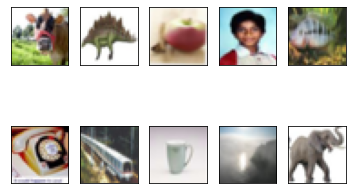

In [ ]:
# Display some images

import matplotlib.pyplot as plt

for i in range(0, 10):
  ax = plt.subplot(2, 5, 1 + i)
  plt.imshow(xtrain[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show()

In [ ]:
# Convert labels to one hot encoding matrix

from keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
# Build the model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, UpSampling2D

model = keras.Sequential([
    UpSampling2D(size=(7, 7), interpolation='bilinear', input_shape=(32, 32, 3)),
    tf.keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top=False, pooling='avg'),
    Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

model.layers[0].trainable = False

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 24,137,956
Trainable params: 24,084,836
Non

In [ ]:
# Train

history = model.fit(xtrain, 
                    ytrain,
                    epochs=20,
                    validation_split=0.1,
                    batch_size=32,
                    shuffle=True,
                    verbose=1) 

Epoch 1/20
1407/1407 [==============================] - 505s 347ms/step - loss: 3.2280 - accuracy: 0.2088 - val_loss: 2.7664 - val_accuracy: 0.2866
Epoch 2/20
1407/1407 [==============================] - 489s 347ms/step - loss: 2.0435 - accuracy: 0.4421 - val_loss: 3.3971 - val_accuracy: 0.2656
Epoch 3/20
1407/1407 [==============================] - 488s 347ms/step - loss: 1.5611 - accuracy: 0.5555 - val_loss: 2.7474 - val_accuracy: 0.3622
Epoch 4/20
1407/1407 [==============================] - 488s 347ms/step - loss: 1.2211 - accuracy: 0.6429 - val_loss: 1.7247 - val_accuracy: 0.5436
Epoch 5/20
1407/1407 [==============================] - 488s 347ms/step - loss: 0.9228 - accuracy: 0.7201 - val_loss: 1.5266 - val_accuracy: 0.5796
Epoch 6/20
1407/1407 [==============================] - 494s 351ms/step - loss: 0.6419 - accuracy: 0.7982 - val_loss: 1.5935 - val_accuracy: 0.5830
Epoch 7/20
1407/1407 [==============================] - 493s 350ms/step - loss: 0.4404 - accuracy: 0.8574 - val_

Training and validation loss    :  0.5933319438248873 2.2383477628231048
Training and validation accuracy:  0.832318888604641 0.5358999967575073
313/313 [==============================] - 30s 94ms/step - loss: 2.2548 - accuracy: 0.6052
Accuracy : [2.2548394203186035, 0.6051999926567078]


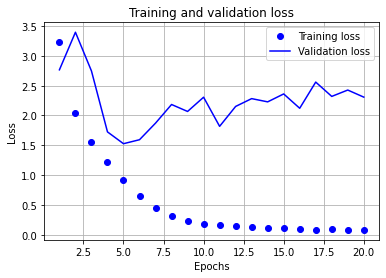

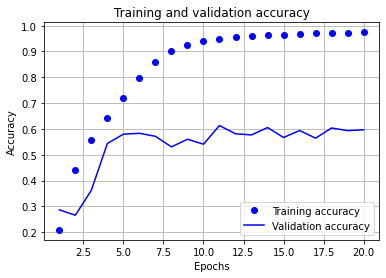

In [ ]:
# Plot

import numpy as np

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('Accuracy :', score)

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

313/313 [==============================] - 28s 91ms/step


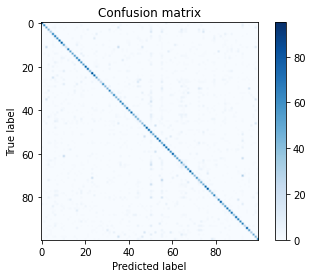

In [ ]:
from sklearn.metrics import confusion_matrix

cm_labels = range(0, 100)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(model.predict(xtest), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()